# Capstone Project II: Narrative analytics and experimentation

By Amanu Haile

Problem: 
How to determine the rate at which the annual salary gap between high and low-income employees decreases or increases? As the economy of the United States becomes dominant with respect to most other economies in the world, the wealth inequality within the wealthy and the rest of the population becomes greater. 

The Potential Solution:
To support our claim, we will study the wealth distribution in the city of Los Angeles in terms of annual salary. 

Methods of Testing the solution:

The Los Angeles City Controller Office releases payroll information for all city employees on a quarterly basis.  This dataset includes years from 2013-2016. The different job titles are classified by department title, Job class title, as well as the projected annual salary for each and average benefit costs. 

The total population of data gathered over the years will be classified and place under two main groups: low-income employees and High-income employees. The central limit theorem will be used to determine the best statistical value to distinguish the two main groups of employees from the total population.

Within each employee group, t-test is performed on subgroups of annual salaries from 2014 and 2016. 

Successes Metric: 

The t-test will be a p-value of 0.05 or less to reject the null hypothesis and find that there is a difference in salaries from earlier years compared to 2016. 

Secondary Metrics:

The rate of projected annual salary difference from 2013-2016

The year over year change of salaries for both groups over the last four years

The difference in benefits offered to employees in both groups 

The total annual payments difference from projected annual salaries for both groups

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

# Data Assessment

In [2]:
la_payroll=pd.read_csv('data.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (4,24,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
la_payroll.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [4]:
la_payroll.shape

(285008, 35)

In [5]:
la_payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
Row ID                          285008 non-null int64
Year                            285008 non-null int64
Department Title                285008 non-null object
Payroll Department              231463 non-null float64
Record Number                   285008 non-null object
Job Class Title                 285008 non-null object
Employment Type                 285008 non-null object
Hourly or Event Rate            263987 non-null object
Projected Annual Salary         285008 non-null object
Q1 Payments                     285008 non-null object
Q2 Payments                     285008 non-null object
Q3 Payments                     285008 non-null object
Q4 Payments                     285008 non-null object
Payments Over Base Pay          285008 non-null object
% Over Base Pay                 285008 non-null object
Total Payments                  285008 non-null object
Base Pay  

In [6]:
la_payroll.isnull().sum()

Row ID                              0
Year                                0
Department Title                    0
Payroll Department              53545
Record Number                       0
Job Class Title                     0
Employment Type                     0
Hourly or Event Rate            21021
Projected Annual Salary             0
Q1 Payments                         0
Q2 Payments                         0
Q3 Payments                         0
Q4 Payments                         0
Payments Over Base Pay              0
% Over Base Pay                     0
Total Payments                      0
Base Pay                            0
Permanent Bonus Pay                 0
Longevity Bonus Pay                 0
Temporary Bonus Pay                 0
Lump Sum Pay                    42264
Overtime Pay                      434
Other Pay & Adjustments             0
Other Pay (Payroll Explorer)        0
MOU                             21021
MOU Title                       21021
FMS Departme

## Data cleaning & Validation 

In [7]:
#Drop columns with high missing values & we won't need for this analysis
la_payroll=la_payroll.drop(['Row ID','Payroll Department','Job Class Link',
             'Record Number','MOU','FMS Department','MOU Title','% Over Base Pay','Pay Grade'], axis=1)

In [8]:
# show the first 10 columns of the DataFrame and only the first 5 rows
la_payroll.iloc[:5,0:10]

,Year,Department Title,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments
0,2014,Water And Power (DWP),Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,$17829.78,$17678.24,$22946.57
1,2013,Police (LAPD),Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20
2,2013,Police (LAPD),Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49
3,2013,Harbor (Port of LA),Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80
4,2014,Public Works - Sanitation,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10


In [9]:
#show the rest of the columns of the DataFrame 
la_payroll.iloc[:5,10:]

,Payments Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),Job Class,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan
0,$14273.91,$74584.48,$60310.57,$0.00,$0.00,$0.00,NaN,$369.12,$13904.79,$13904.79,1230,$16842.08,$1282.61,$0.00,$18124.69,DWP
1,$1700.40,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,2214,$11651.40,$898.08,$191.04,$12740.52,Police
2,$4120.20,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,2214,$11651.40,$898.08,$191.04,$12740.52,Police
3,$14275.44,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,3184,$10710.24,$405.24,$11.40,$11126.88,City
4,$5191.62,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,1368,$11000.40,$409.68,$11.40,$11421.48,City


In [10]:
#Drop all rows with missing values
la_payroll=la_payroll.dropna()

In [11]:
la_payroll.shape

(203743, 26)

In [13]:
#Remove the $ sign and set each values to numeric value 
for col in ['Hourly or Event Rate','Projected Annual Salary','Lump Sum Pay','Q1 Payments',
          'Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay','Total Payments',
          'Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost',
          'Average Dental Cost','Average Basic Life','Average Benefit Cost']:
    la_payroll[col] = la_payroll[col].str.replace('$','')
    la_payroll[col] = pd.to_numeric(la_payroll[col])

# Analysis

In [14]:
#Remove outliers and normlize
la_payroll=la_payroll[la_payroll['Projected Annual Salary']!=0]
la_payroll=la_payroll[la_payroll['Total Payments']>=10000]

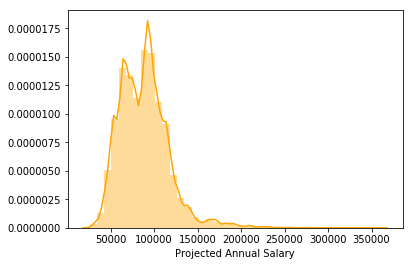

In [15]:
sns.distplot(la_payroll['Projected Annual Salary'], bins=40, color='orange')

In [16]:
print('Mean of total population:',la_payroll['Projected Annual Salary'].mean())
print('Median of total population:',la_payroll['Projected Annual Salary'].median())

Mean of total population: 88427.64214342106
Median of total population: 87511.73


In [17]:
mean_salary=la_payroll['Projected Annual Salary'].mean()

#Classify two groups based on income salary status
low_income=la_payroll[la_payroll['Projected Annual Salary'] <= mean_salary]
high_income=la_payroll[la_payroll['Projected Annual Salary'] > mean_salary]

In [18]:
print('Low_income population size:',len(low_income['Projected Annual Salary']))
print('High_income population size:',len(high_income['Projected Annual Salary']))

Low_income population size: 97967
High_income population size: 93288


# t-test

Hypothesis: Is there a significant difference in employee salaries from 3 years before and now 

Null Hypothesis: There is no difference between the salaries from 3 years before and now

### Low Income Employees

In [19]:
#Generate population values for high income emplyees
pop_2014=low_income[low_income['Year']==2014]
pop_2016=low_income[low_income['Year']==2016]

#Generate samples with that is 10% of the population
sample_low_2014=low_income[low_income['Year']==2014].sample(frac=0.1)
sample_low_2016=low_income[low_income['Year']==2016].sample(frac=0.1)

#### Population parameters

In [20]:
print('2014 population size:',len(pop_2014['Projected Annual Salary']))
print('2016 population size:',len(pop_2016['Projected Annual Salary']))
print('2014 population mean:',pop_2014['Projected Annual Salary'].mean())
print('2016 population mean:',pop_2016['Projected Annual Salary'].mean())
print('2014 population std:',pop_2014['Projected Annual Salary'].std())
print('2016 population std:',pop_2016['Projected Annual Salary'].std())

2014 population size: 18250
2016 population size: 41190
2014 population mean: 68033.30335945207
2016 population mean: 67247.97740495265
2014 population std: 12009.53562449685
2016 population std: 12932.38289627438


#### Sample parameters

In [21]:
print('2014 sample size:',len(sample_low_2014['Projected Annual Salary']))
print('2016 sample size:',len(sample_low_2016['Projected Annual Salary']))
print('2014 sample mean:',sample_low_2014['Projected Annual Salary'].mean())
print('2016 sample mean:',sample_low_2016['Projected Annual Salary'].mean())
print('2014 Sample std:',sample_low_2014['Projected Annual Salary'].std())
print('2016 Sample std:',sample_low_2016['Projected Annual Salary'].std())

2014 sample size: 1825
2016 sample size: 4119
2014 sample mean: 67572.18116164384
2016 sample mean: 67283.60306142268
2014 Sample std: 12046.287943144831
2016 Sample std: 12981.30693035197


In [34]:
print('t-statistics and P-value:\n',stats.ttest_ind(sample_low_2014['Projected Annual Salary'],
                                                  sample_low_2016['Projected Annual Salary']))

t-statistics and P-value:
 Ttest_indResult(statistic=0.8079649464630436, pvalue=0.4191431054676834)


### High Income Employees

In [23]:
#Generate population values for high income emplyees
pop_2014=high_income[high_income['Year']==2014]
pop_2016=high_income[high_income['Year']==2016]

#Generate samples with that is 10% of the population
sample_high_2014=high_income[high_income['Year']==2014].sample(frac=0.1)
sample_high_2016=high_income[high_income['Year']==2016].sample(frac=0.1)

#### Population parameters

In [24]:
print('2014 population size:',len(pop_2014['Projected Annual Salary']))
print('2016 population size:',len(pop_2016['Projected Annual Salary']))
print('2014 population mean:',pop_2014['Projected Annual Salary'].mean())
print('2016 population mean:',pop_2016['Projected Annual Salary'].mean())

2014 population size: 17737
2016 population size: 41170
2014 population mean: 109613.87840333764
2016 population mean: 111425.75869953849


#### Sample parameters 

In [25]:
print('2014 sample size:',len(sample_high_2014['Projected Annual Salary']))
print('2016 sample size:',len(sample_high_2016['Projected Annual Salary']))
print('2014 sample mean:',sample_high_2014['Projected Annual Salary'].mean())
print('2016 sample mean:',sample_high_2016['Projected Annual Salary'].mean())

2014 sample size: 1774
2016 sample size: 4117
2014 sample mean: 109763.55815107105
2016 sample mean: 111187.12111003158


In [26]:
print('t-statistics and P-value:\n',stats.ttest_ind(sample_high_2014['Projected Annual Salary'],
                                                    sample_high_2016['Projected Annual Salary']))

t-statistics and P-value:
 Ttest_indResult(statistic=-2.180701100118919, pvalue=0.029244973132669962)


#### Analysis:
Based on the p-value we reject the null hypothesis and accept that there is a significant difference in the salaries for high income employees. While, we fail to reject the null hypothesis for low income emplyees. 

The t-value for low-income employees was higher compared to those of high-income employees. This could mean that there is more variance interms of salary difference for low-income employees compared to High income emplyees.  

### Secondary Metrics

The difference in the employee salary rate:

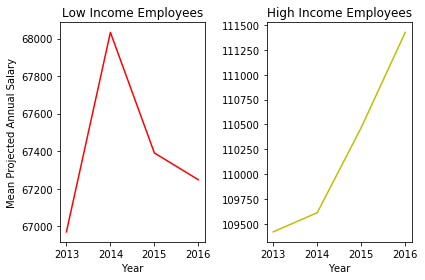

In [27]:
fig,axes=plt.subplots(1,2,figsize=(6,4))

axes[0].plot(low_income.groupby('Year').mean()['Projected Annual Salary'],color='r',label='dd')
axes[1].plot(high_income.groupby('Year').mean()['Projected Annual Salary'],color='y')

axes[0].set_title('Low Income Employees')
axes[1].set_title('High Income Employees')
axes[0].set_ylabel('Mean Projected Annual Salary')
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Year')

plt.tight_layout()

Year over year change for the last 4 years?

In [28]:
print('Low Income year over year percent change:',
      low_income.groupby('Year').sum()['Projected Annual Salary'].pct_change())
print('High Income year over year percent change:',
     high_income.groupby('Year').sum()['Projected Annual Salary'].pct_change())

Low Income year over year percent change: Year
2013         NaN
2014   -0.085501
2015   -0.009228
2016    1.251713
Name: Projected Annual Salary, dtype: float64
High Income year over year percent change: Year
2013         NaN
2014    0.106020
2015    0.040705
2016    1.267216
Name: Projected Annual Salary, dtype: float64


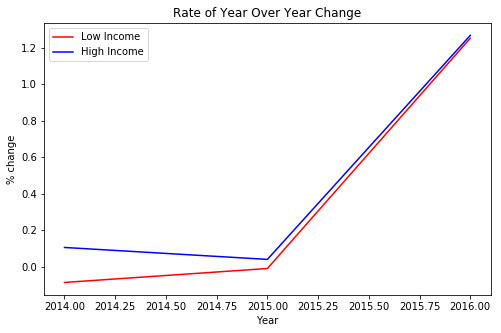

In [51]:
fig,axes=plt.subplots(figsize=(8,5))

axes.plot(low_income.groupby('Year').sum()['Projected Annual Salary'].pct_change(),
          color='r',label='Low Income')
axes.plot(high_income.groupby('Year').sum()['Projected Annual Salary'].pct_change(),
          color='b',label='High Income')
axes.set_xlabel('Year')
axes.set_ylabel('% change')
axes.set_title('Rate of Year Over Year Change')

plt.legend(loc=2)

#### Analysis: 

Low-income employees had a negative percent change in salary until 2015 while high-income employees had positive percent change since 2013. The percent change in salary for both groups seems to converge to the same range after 2015 to 2016. 

How does total salary differ from projected salary for low and high inome employees?  

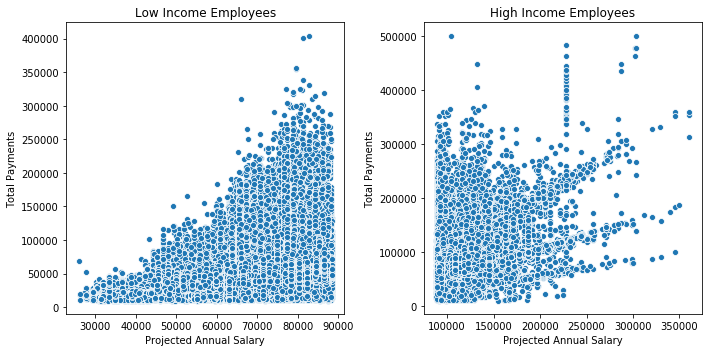

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x=low_income['Projected Annual Salary'],
              y=low_income['Total Payments'],ax=axes[0])
sns.scatterplot(x=high_income['Projected Annual Salary'],
              y=high_income['Total Payments'],ax=axes[1])
axes[0].set_title('Low Income Employees')
axes[1].set_title('High Income Employees')

plt.tight_layout()

#### Analysis: 

For low-income employees, the total payments were lower than the projected annual salaries. However, most high-income employees made about the same salary as the projected annual salary or more. 

How do the benefits distributions differ across low and high-income employees? 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


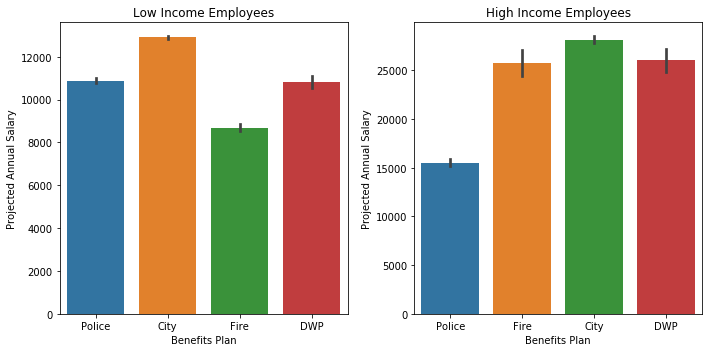

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=low_income['Benefits Plan'],y=low_income['Projected Annual Salary'],
            estimator=np.std, data=low_income,ax=axes[0])
sns.barplot(x=high_income['Benefits Plan'],y=high_income['Projected Annual Salary'],
            estimator=np.std, data=high_income,ax=axes[1])

axes[0].set_title('Low Income Employees')
axes[1].set_title('High Income Employees')
plt.tight_layout()

How do the average benefits cost distribution differ across low and high-income employees? 

In [49]:
low_bybenefits=low_income.groupby('Benefits Plan')
high_bybenefits=high_income.groupby('Benefits Plan')

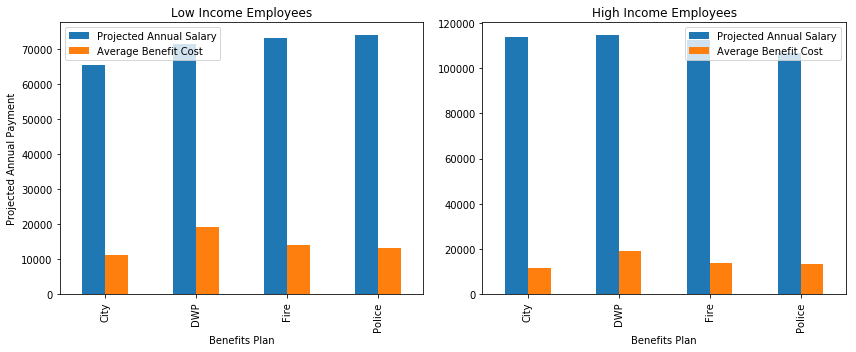

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

low_bybenefits['Projected Annual Salary','Average Benefit Cost'].mean().plot(kind='bar', ax=axes[0])
high_bybenefits['Projected Annual Salary','Average Benefit Cost'].mean().plot(kind='bar', ax=axes[1])

axes[0].set_ylabel('Projected Annual Payment')
axes[0].set_title('Low Income Employees')
axes[1].set_title('High Income Employees')

plt.tight_layout()

#### Analysis:

It was shown that benefits distribution was better for lower-income employees compared to others.

## Conclusion: 

In conclusion, it was evident that lower-income employees have seen negative growth in annual salary from earlier years such as 2013 and 2014 or were paid the same salary as the year before. Most high-income employees made more money than their projected annual salary. In addition, high-income employees saw a consistent positive increase in salary since 2013.